<a id="1"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#85c1e9; overflow:hidden"><b> Spam Detection 📧</b></div>

<div style="text-align: center;">
    <img src="https://penplusbytes.org/wp-content/uploads/2019/08/spam-1.jpg" alt="alzheimers" style="width:100%; height:auto; border-radius: 15px;">
</div>



<h2>Summary 📝</h2>
<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #85c1e9;">
    <ul style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em;">
        <li>In this project, we will use five different machine learning models: Support Vector Machine (SVM), XGBoost, CatBoost, Decision Tree, and Logistic Regression, in order to develop a system for detecting spam emails. To evaluate the performance of these models, various visual evaluation techniques will be employed, including the Confusion Matrix, Classification Report, ROC Curves, and Precision-Recall Curve. These visualizations will provide a comprehensive understanding of how well each model performs in classifying emails as spam or not spam.</li>
    </ul>
</div>

<a id="2"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#85c1e9; overflow:hidden"><b> Import Libraries </b></div>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import numpy as np
from sklearn.preprocessing import label_binarize
from wordcloud import WordCloud

<a id="3"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#85c1e9; overflow:hidden"><b> Data Analysis </b></div>

In [2]:
df=pd.read_csv('/kaggle/input/spam-emails/spam.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
df.shape

(5572, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [6]:
df['Category'] = df['Category'].map({'spam': 1, 'ham': 0})

X = df['Message']
y = df['Category']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(max_features=3000)
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()

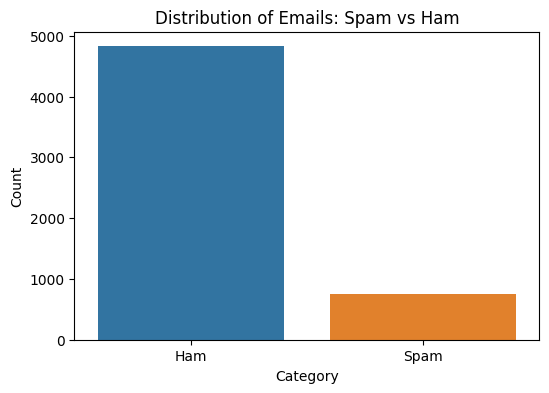

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Category', data=df)
plt.title('Distribution of Emails: Spam vs Ham')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Ham', 'Spam'])
plt.show()

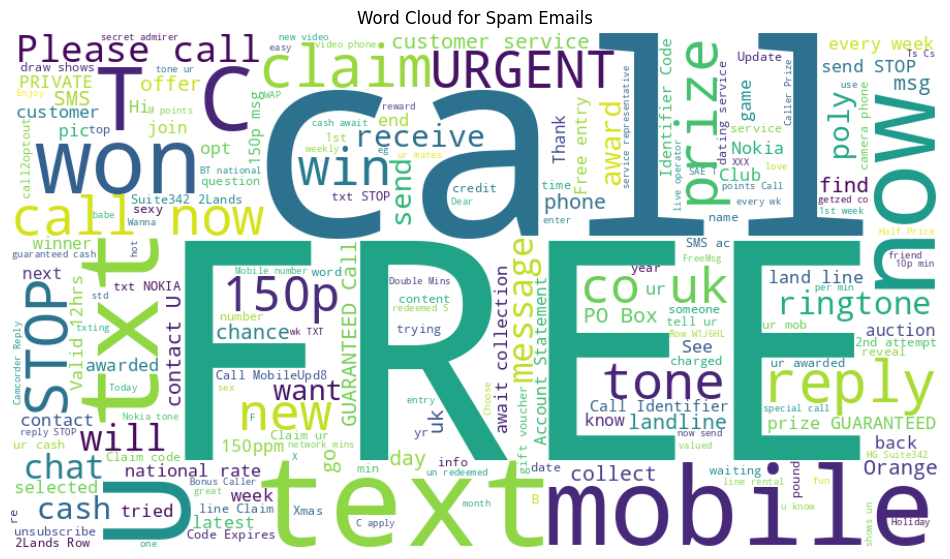

In [8]:
spam_words = ' '.join(list(df[df['Category'] == 1]['Message']))
spam_wordcloud = WordCloud(width=900, height=500, background_color='white').generate(spam_words)

plt.figure(figsize=(12, 8))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Spam Emails')
plt.axis('off')
plt.show()

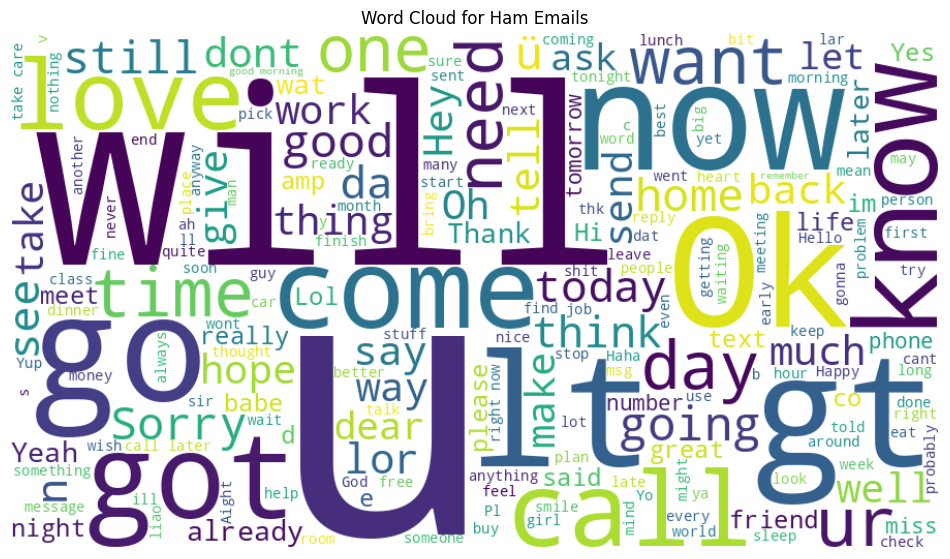

In [9]:
ham_words = ' '.join(list(df[df['Category'] == 0]['Message']))
ham_wordcloud = WordCloud(width=900, height=500, background_color='white').generate(ham_words)

plt.figure(figsize=(12, 8))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Ham Emails')
plt.axis('off')
plt.show()

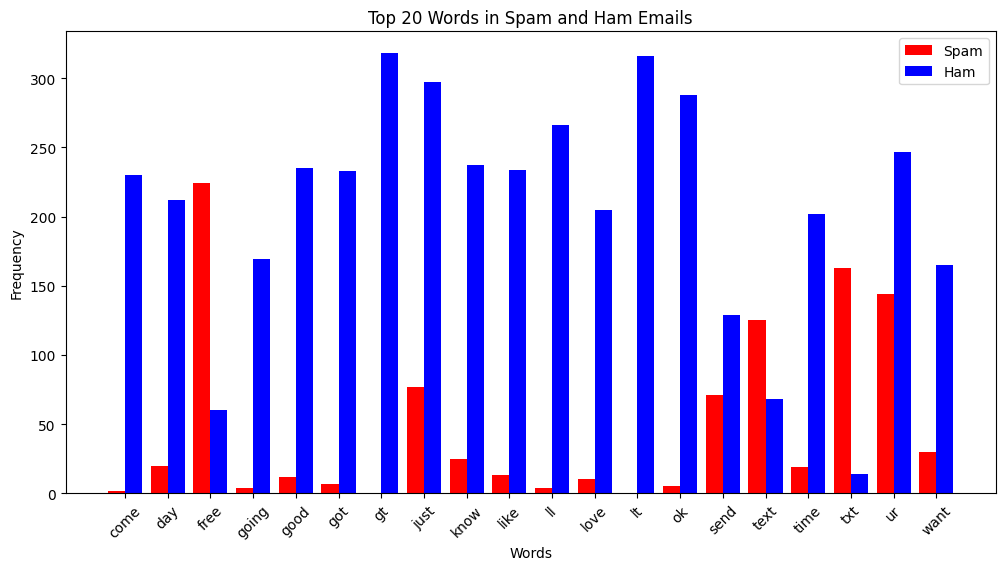

In [10]:
vectorizer = CountVectorizer(max_features=20, stop_words='english')
X_counts = vectorizer.fit_transform(df['Message'])

spam_df = df[df['Category'] == 1]
ham_df = df[df['Category'] == 0]

spam_counts = vectorizer.transform(spam_df['Message']).toarray().sum(axis=0)
ham_counts = vectorizer.transform(ham_df['Message']).toarray().sum(axis=0)

words = vectorizer.get_feature_names_out()
x = np.arange(len(words))

plt.figure(figsize=(12, 6))
plt.bar(x - 0.2, spam_counts, width=0.4, label='Spam', color='red')
plt.bar(x + 0.2, ham_counts, width=0.4, label='Ham', color='blue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Words in Spam and Ham Emails')
plt.xticks(ticks=x, labels=words, rotation=45)
plt.legend()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


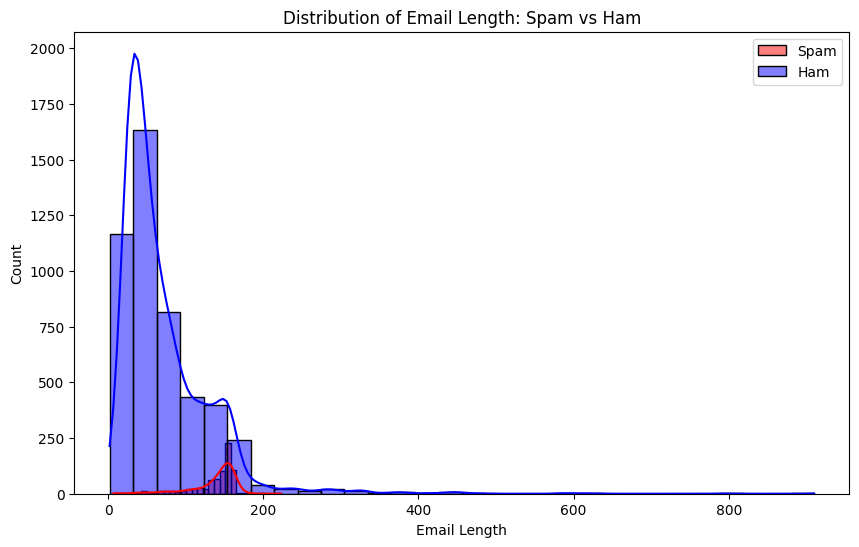

In [11]:
df['Email Length'] = df['Message'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df[df['Category'] == 1]['Email Length'], color='red', kde=True, label='Spam', bins=30)
sns.histplot(df[df['Category'] == 0]['Email Length'], color='blue', kde=True, label='Ham', bins=30)
plt.xlabel('Email Length')
plt.title('Distribution of Email Length: Spam vs Ham')
plt.legend()
plt.show()

<a id="4"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#85c1e9; overflow:hidden"><b> Build Models </b></div>

In [12]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_tfidf, y_train)
svm_pred = svm_model.predict(X_test_tfidf)

In [13]:
xgb_model = XGBClassifier(n_estimators=100, max_depth=10, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_tfidf, y_train)
xgb_pred = xgb_model.predict(X_test_tfidf)

In [14]:
catboost_model = CatBoostClassifier(iterations=100, depth=10, learning_rate=0.1, verbose=0, random_state=42)
catboost_model.fit(X_train_tfidf, y_train)
catboost_pred = catboost_model.predict(X_test_tfidf)

In [15]:
dt_model = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_model.fit(X_train_tfidf, y_train)
dt_pred = dt_model.predict(X_test_tfidf)

In [16]:
lr_model = LogisticRegression(max_iter=100, random_state=42)
lr_model.fit(X_train_tfidf, y_train)
lr_pred = lr_model.predict(X_test_tfidf)

<a id="5"></a>
# <div style="text-align:center; border-radius:15px 50px; padding:15px; color:white; margin:0; font-size:100%; font-family:Pacifico; background-color:#85c1e9; overflow:hidden"><b> Evaluate Models </b></div>


<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #85c1e9;">
    <ul style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em;">
       
<p>To validate and visualize the performance of these models, we will employ several evaluation approaches, including classification reports, confusion matrices, ROC curves, as well as precision-recall curves. These methods provide a comprehensive understanding of how well these models performed in the following aspects:</p>

<ul>
   <li><strong>Classification Reports:</strong> It provides metrics such as precision, recall, and F1-score, which allows to validate the models' in classifying emails correctly.</li>
    <li><strong>Confusion Matrix:</strong> It displays insights into the actual versus predicted classifications.</li>
     <li><strong>ROC Curves:</strong> It helps to visualize the trade-off between true positive and false positive rates, confirming if the models show a good balance in classification.</li>
    <li><strong>Precision-Recall Curves:</strong> It demonstrates the precision and recall trade-offs, especially important for imbalanced datasets like spam detection, confirming that the models are able to handle the task.</li>
</ul>

   
</div>

SVM Classifier:
Accuracy: 0.9901345291479821
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       966
           1       1.00      0.93      0.96       149

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.98      1115
weighted avg       0.99      0.99      0.99      1115

Confusion Matrix:


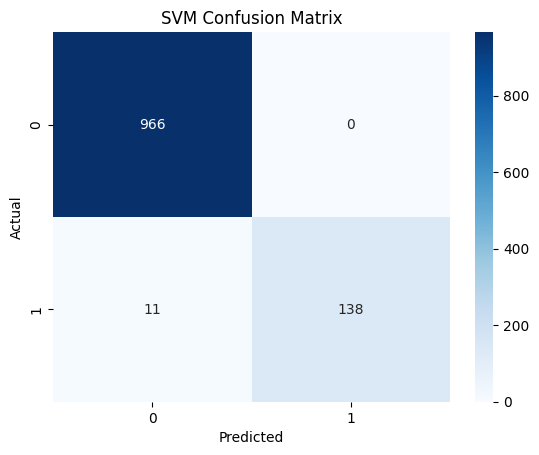

In [17]:
print("SVM Classifier:")
print(f"Accuracy: {accuracy_score(y_test, svm_pred)}")
print("Classification Report:")
print(classification_report(y_test, svm_pred))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

XGBoost Classifier:
Accuracy: 0.9802690582959641
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       966
           1       0.96      0.89      0.92       149

    accuracy                           0.98      1115
   macro avg       0.97      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix:


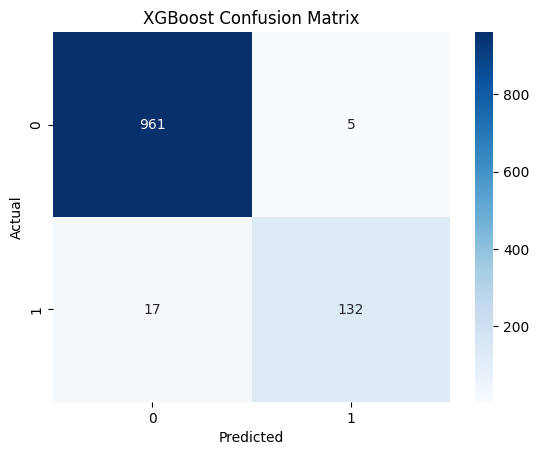

In [18]:
print("XGBoost Classifier:")
print(f"Accuracy: {accuracy_score(y_test, xgb_pred)}")
print("Classification Report:")
print(classification_report(y_test, xgb_pred))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, xgb_pred), annot=True, fmt='d', cmap='Blues')
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

CatBoost Classifier:
Accuracy: 0.9766816143497757
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       966
           1       0.99      0.83      0.91       149

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix:


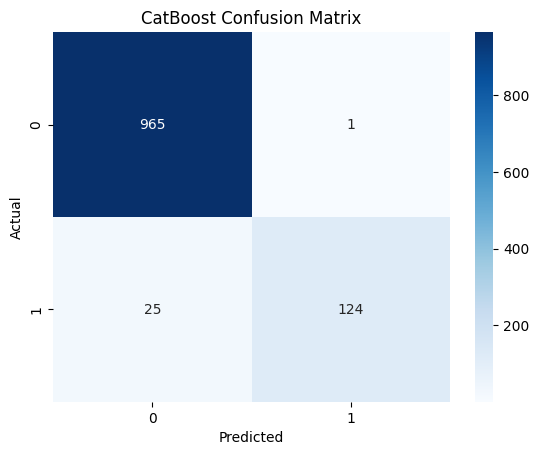

In [19]:

print("CatBoost Classifier:")
print(f"Accuracy: {accuracy_score(y_test, catboost_pred)}")
print("Classification Report:")
print(classification_report(y_test, catboost_pred))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, catboost_pred), annot=True, fmt='d', cmap='Blues')
plt.title('CatBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Decision Tree Classifier:
Accuracy: 0.9650224215246637
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       966
           1       0.94      0.79      0.86       149

    accuracy                           0.97      1115
   macro avg       0.95      0.89      0.92      1115
weighted avg       0.96      0.97      0.96      1115

Confusion Matrix:


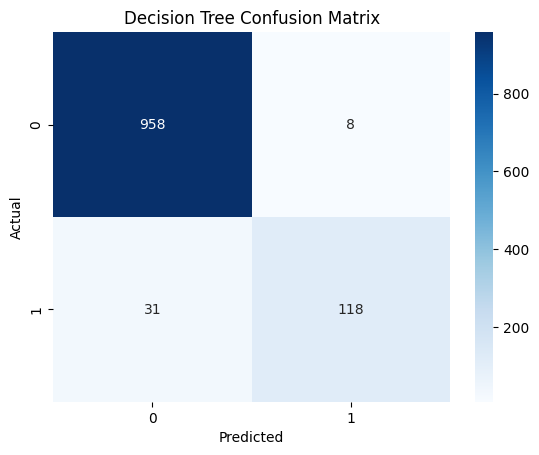

In [20]:
print("Decision Tree Classifier:")
print(f"Accuracy: {accuracy_score(y_test, dt_pred)}")
print("Classification Report:")
print(classification_report(y_test, dt_pred))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, dt_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Logistic Regression Classifier:
Accuracy: 0.9757847533632287
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       966
           1       1.00      0.82      0.90       149

    accuracy                           0.98      1115
   macro avg       0.99      0.91      0.94      1115
weighted avg       0.98      0.98      0.97      1115

Confusion Matrix:


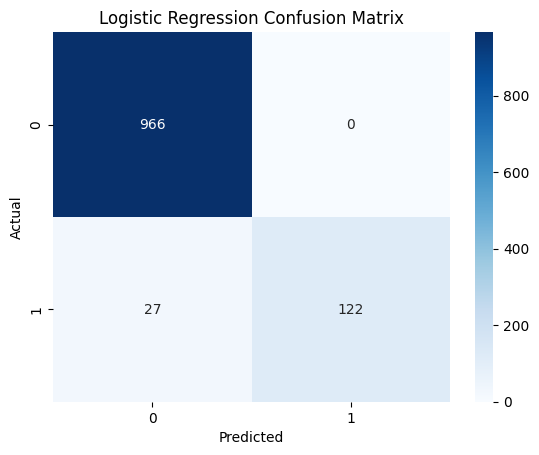

In [21]:
print("Logistic Regression Classifier:")
print(f"Accuracy: {accuracy_score(y_test, lr_pred)}")
print("Classification Report:")
print(classification_report(y_test, lr_pred))
print("Confusion Matrix:")
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

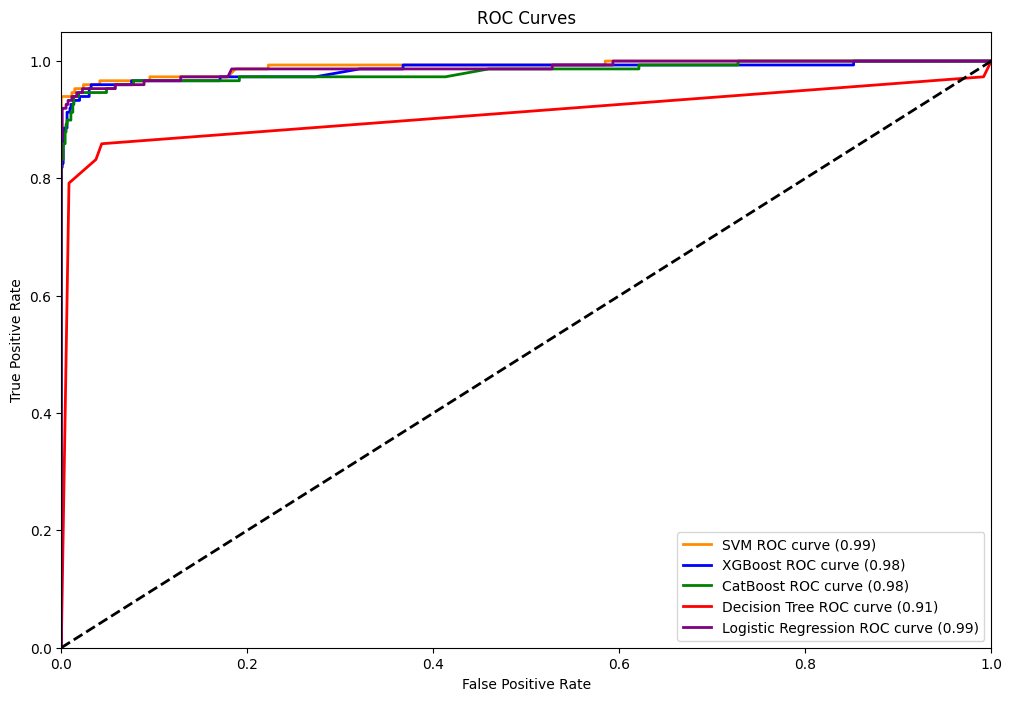

In [22]:
n_classes = len(np.unique(y_test))
if n_classes == 2:
    y_test_bin = label_binarize(y_test, classes=[0, 1])

svm_scores = svm_model.decision_function(X_test_tfidf)
fpr_svm, tpr_svm, _ = roc_curve(y_test_bin, svm_scores)
roc_auc_svm = auc(fpr_svm, tpr_svm)

xgb_scores = xgb_model.predict_proba(X_test_tfidf)[:, 1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test_bin, xgb_scores)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

catboost_scores = catboost_model.predict_proba(X_test_tfidf)[:, 1]
fpr_catboost, tpr_catboost, _ = roc_curve(y_test_bin, catboost_scores)
roc_auc_catboost = auc(fpr_catboost, tpr_catboost)

dt_scores = dt_model.predict_proba(X_test_tfidf)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test_bin, dt_scores)
roc_auc_dt = auc(fpr_dt, tpr_dt)


lr_scores = lr_model.predict_proba(X_test_tfidf)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test_bin, lr_scores)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure(figsize=(12, 8))

plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label=f'SVM ROC curve ({roc_auc_svm:0.2f})')
plt.plot(fpr_xgb, tpr_xgb, color='blue', lw=2, label=f'XGBoost ROC curve ({roc_auc_xgb:0.2f})')
plt.plot(fpr_catboost, tpr_catboost, color='green', lw=2, label=f'CatBoost ROC curve ({roc_auc_catboost:0.2f})')
plt.plot(fpr_dt, tpr_dt, color='red', lw=2, label=f'Decision Tree ROC curve ({roc_auc_dt:0.2f})')
plt.plot(fpr_lr, tpr_lr, color='purple', lw=2, label=f'Logistic Regression ROC curve ({roc_auc_lr:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2) 
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.show()

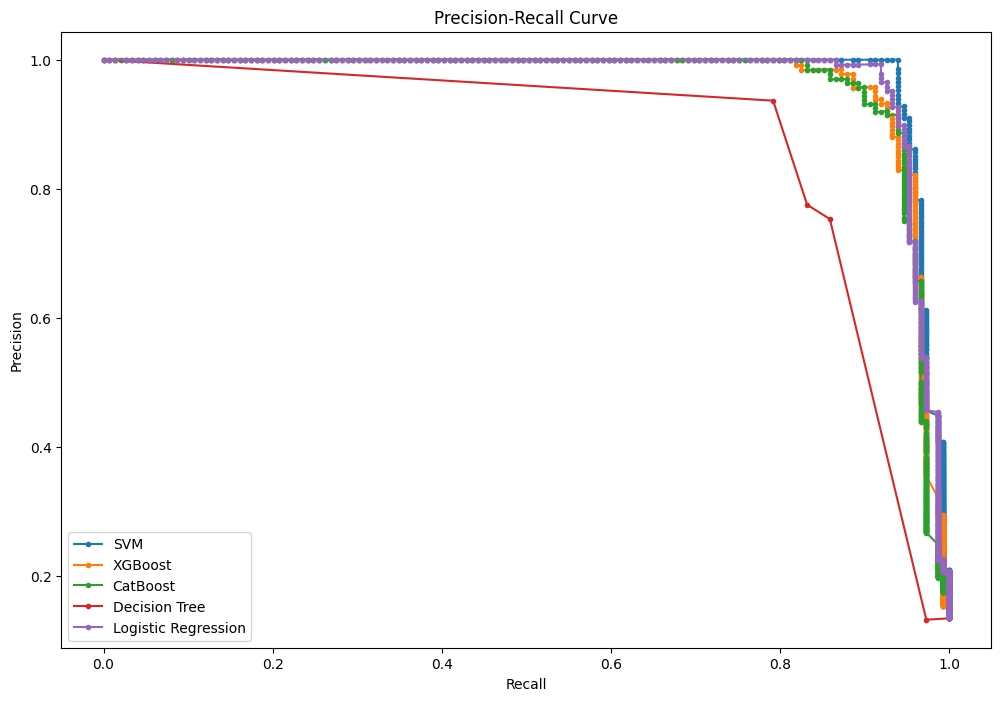

In [23]:
svm_prob = svm_model.decision_function(X_test_tfidf)
xgb_prob = xgb_model.predict_proba(X_test_tfidf)[:, 1]
catboost_prob = catboost_model.predict_proba(X_test_tfidf)[:, 1]
dt_prob = dt_model.predict_proba(X_test_tfidf)[:, 1]
lr_prob = lr_model.predict_proba(X_test_tfidf)[:, 1]

precision_svm, recall_svm, _ = precision_recall_curve(y_test, svm_prob)
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, xgb_prob)
precision_catboost, recall_catboost, _ = precision_recall_curve(y_test, catboost_prob)
precision_dt, recall_dt, _ = precision_recall_curve(y_test, dt_prob)
precision_lr, recall_lr, _ = precision_recall_curve(y_test, lr_prob)


plt.figure(figsize=(12, 8))

plt.plot(recall_svm, precision_svm, marker='.', label='SVM')
plt.plot(recall_xgb, precision_xgb, marker='.', label='XGBoost')
plt.plot(recall_catboost, precision_catboost, marker='.', label='CatBoost')
plt.plot(recall_dt, precision_dt, marker='.', label='Decision Tree')
plt.plot(recall_lr, precision_lr, marker='.', label='Logistic Regression')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="best")
plt.show()

<h2>Conclusions 📝</h2>
<div style="padding: 20px; border-color: #c77220; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border: 2px solid #85c1e9;">
    <ul style="font-size: 18px; font-family: 'Arial'; line-height: 1.5em;">
        <li><p>In this project, we developed and evaluated five different machine learning models (Support Vector Machine, XGBoost, CatBoost, Decision Tree, and Logistic Regression) for detecting spam emails. Each of these models demonstrated strong performance, achieving accuracy rates above 90%. The high level of accuracy indicates that the models were effective in distinguishing between spam and ham emails.</p>
